# Function Fitting

### load data & set functions

In [1]:
from six.moves import cPickle as pickle
import numpy as np
import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
import DC_Pickle as dcp
import matplotlib.pyplot as plt
%matplotlib inline

def open_Pickle(pickle_path_file):
    try :
        with open(pickle_path_file, 'rb') as f:
            train = pickle.load(f)
            return train
    except Exception as e :
        print("Unable to load data to", pickle_path_file, ': ', e)
        return
    
def disp_Data(x_axis, y_axis, colour_shape='b.', rows=1, columns=1, size=(5, 5)):
    #import matplotlib.pyplot as plt
    #%matplotlib inline

    fig, axes = plt.subplots(rows, columns, figsize=size)
    axes.plot(x_axis, y_axis, colour_shape)
    plt.show()
    
def polynomial_curve(x, w0, w1):
    return w0 + w1*x

def powerlaw_curve(x, w0, w1, w2):
    return -w0 * (x)**(-w1) + w2 # -w0 * np.power((x), w1) + w2

def powerlaw_curve2(x, w0, w1, w2, w3):
    return -w0 * (x+w3)**(w1) + w2 # -w0 * np.power((x), w1) + w2

def exponential_curve(x, a, b, c):
    return a * np.exp(-b * x) + c

(15,)
(2, 15)
[ 0.06949649  0.11833792  0.12415684  0.21923799  0.21402511  0.2695956
  0.38354837  0.1381195   0.2282138   0.21838991  0.20394061  0.29085711
  0.15276998  0.26760545  0.32473221]


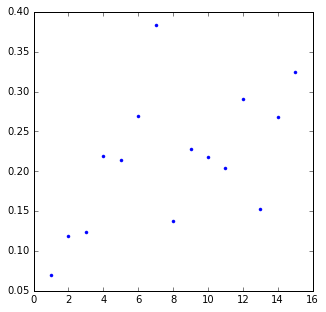

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [2]:
data_path = "../../data/pickles/clusters/centroid2.pickle"
train_data = dcp.open_Pickle(data_path)
print(np.shape(train_data[0, :, 0]))
train_data = train_data[:, :, 0]

print(np.shape(train_data)) # centroid of cluster 1
print(train_data[0,:])
attempts = np.arange(15)+1 # attempts
scores = train_data[0,:] # centroid of cluster 1

disp_Data(attempts, scores)

print(attempts)

### exponential fit

In [3]:
popt, pcov = curve_fit(exponential_curve, attempts, scores)

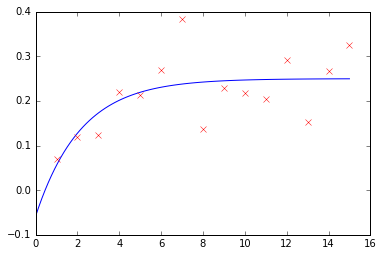

In [4]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, exponential_curve(x_fit, popt[0], popt[1], popt[2]), 'b-')
plt.plot(attempts, scores, 'rx')

### polynoimial fit

In [ ]:
popt, pcov = curve_fit(polynomial_curve, attempts, scores)

In [ ]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, polynomial_curve(x_fit, popt[0], popt[1]), 'b-')
plt.plot(attempts, scores, 'rx')

### power law fit

In [ ]:
popt, pcov = curve_fit(powerlaw_curve, attempts, scores)

In [ ]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, powerlaw_curve(x_fit, popt[0], popt[1], popt[2]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, 0.4])

In [ ]:
def powerlaw_curve2(x, u, a, c, d):
    return u-a*(x+d)**(-c)

popt, pcov = curve_fit(powerlaw_curve2, attempts, scores, maxfev = 1000000)

x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, powerlaw_curve2(x_fit, popt[0], popt[1], popt[2], popt[3]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, 0.4])
print(popt)

### function fitting by hand